<a href="https://colab.research.google.com/github/nickstone1911/data-analysis-practice/blob/main/XGBoost_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tech Lesson 16: XGBoost Regression in Python
>- Overview: Gradient Boosting is an ensemble technique that builds a strong predictive model by combining the predictions of many weak models, typically decision trees.

>- The key idea behind Gradient Boosting is to sequentially add models to correct the errors of the previous models.
>- In each iteration, a new model is trained to predict the residuals (the differences between the actual and predicted values) of the ensemble.
>- The predictions of all the models are combined to make the final prediction, where each model's contribution is weighted based on its performance.
>- Gradient Boosting is known for its flexibility and ability to handle different types of data, but it can be computationally expensive and sensitive to overfitting.


In this lesson we will discuss the major components of conducting a regression task using the `XGBRegreesor` from the `xgboost` library including the learning objectives listed below.

## Learning Objectives
1. Importing the required modules
2. Instantiating and fitting `XGBRegressor()`
3. Evaluating the results of a `XGBRegressor`
>- Including a review of regression metrics
4. Developing an understanding of key hyperparameters
5. Performing a grid search to find optimal hyperparameters
6. Applying graphical analysis to further refine hyperparameters
7. Deploying a XGBoost model to predict new cases

---





# Data Understanding

We will be using a popular regression task dataset which is a real-world real estate dataset.
## Data Description
The data was scraped from publicly available results posted every week from Domain.com.au. This dataset is a good start to begin practicing to compete in a Kaggle competition `Housing Prices Competition for Kaggle Learn Users`. The dataset includes 21 columns which are explained in more detail here: [Melbourne Housing Snapshot](https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot)

## Data Summary

For this exercise we will use: [melb_train.csv](https://drive.google.com/file/d/1-7f58J_leU2q6mzjVD55zz1JAspJtyyg/view?usp=sharing)

### The the dataset contains the following features:

>- Rooms: Number of rooms
>- Price: Price in dollars
>- Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.
>- Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.
>- SellerG: Real Estate Agent
>-Date: Date sold
>- Distance: Distance from CBD
>- Regionname: General Region (West, North West, North, North east …etc)
>- Propertycount: Number of properties that exist in the suburb.
>- Bedroom2 : Scraped # of Bedrooms (from different source)
>- Bathroom: Number of Bathrooms
>- Car: Number of carspots
>- Landsize: Land Size
>- BuildingArea: Building Size
>- CouncilArea: Governing council for the area

## Problem
The goal in this exercise is to create a model that can help predict the price of a home.

>- We won't go through any data processing steps such as dealing with missing values for this exercise as the goal of the lesson is to focus on learning the syntax to build an `XGBoost` model

---

# Section 1: Setting Up the Environment

## 1.1: Imports

In the next cell import the following modules:

>- `os`, `numpy`, `pandas`, `matplotlib.pyplot`, `seaborn`
>- Use the common aliases for each of these


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Set the display format to show 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

## 1.2: Set Your Working Directory

In the next cell(s), set your working directory to your desired workspace for this lesson.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/BAIM4205')
os.getcwd()

'/content/drive/MyDrive/BAIM4205'

In [ ]:
os.listdir()

['spreadspoke_scores.csv',
 'customer.csv',
 'winedata.csv',
 'W1D2 Agenda and Exercises - Student.ipynb',
 'W1D1 - Working With Google Drive and the os Module_student.ipynb',
 'heart.csv',
 'mouse_viral_study.csv',
 'svm_margin_plot.py',
 '__pycache__',
 'wine_fraud.csv',
 'titanic_train.csv',
 '.ipynb_checkpoints',
 'titanic_train_clean.csv',
 'ORNG.csv',
 'USIX.csv',
 'W2D1 Lesson 24: Code-Along - Intro to Data Engineering with the BigQuery API.ipynb',
 'gene_expression.csv',
 'sonar.all-data.csv',
 'bank+marketing.zip',
 'bank-full.csv',
 'GuitarReviews2out.txt',
 'emails2.txt',
 'penguins_size.csv',
 'lesson15_5.1_trees.png',
 'lesson15_5.5_trees.png',
 'churn_train.csv']

## 1.3: Load Data

Download/move the file to your working directory.

>- [melb_train.csv](https://drive.google.com/file/d/1-7f58J_leU2q6mzjVD55zz1JAspJtyyg/view?usp=sharing)

  ---


Load the file into a pandas DataFrame named, `melb_df`:


In [ ]:
melb_df = pd.read_csv('melb_train.csv')

## 1.4: Sample Data

In the next cell, show the first 5 records in `melb_df` in the next cell.

In [ ]:
melb_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,...,1.00,1.00,202.00,NaN,NaN,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,...,1.00,0.00,156.00,79.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
2,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,...,2.00,0.00,134.00,150.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,40 Federation La,3,h,850000.00,PI,Biggin,4/03/2017,2.50,3067.00,...,2.00,1.00,94.00,NaN,NaN,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
4,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,4/06/2016,2.50,3067.00,...,1.00,2.00,120.00,142.00,2014.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00


## 1.5: Data Shape

In the next cell, show the number columns and rows in the `pen_df`

In [ ]:
melb_df.shape

(13480, 21)

---

# Data Exploration Notes
>- We will not go through a full data exploration in this exercise
>- We will focus on learning `XGBRegressor` but don't forget a full project would include a section on data exploration and exploratory data analysis, data preparation, etc.

---

# Section 2: Data Preparation

Tree based models are more robust to outliers than linear models and they do not need variables to be normalized to work. As such, we usually don't need to process our data as much when working with `XGBoost` because this uses an ensemble of trees to generate the model.

For this exercise, we will keep data processing to a minimum by only selecting a few attributes for our features.

## 2.1: Define Features

In the next cell, define the features `X`, with the following columns:

>- Rooms
>- Distance
>- Landsize
>- BuildingArea
>- Yearbuilt

This will give us enough to practice using `XGBoost` while not having to prepare the data. On your own you may wish to explore the other features in the dataset and convert categorical data to dummy variables to try and improve the predictive performance of the model.

In [ ]:
features = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']

X = melb_df[features]

## 2.2: Create Target Feature Variable

In the next cell, define the target for this exercise as `y` which is the `Sales` column.

>- Show the average and standard deviation of sales price in your output in each of the target classes in your results
>- Round both the average and standard deviation to 2 decimals


In [ ]:
y = melb_df['Price']

avg_price = round(y.mean(),2 )
std_price = round(y.std(), 2)

print(f'Average Price: {avg_price}\nStandard Deviation Price: {std_price}')

Average Price: 1075596.21
Standard Deviation Price: 639317.75


## 2.3: Train|Test Split

In the next cell(s), create training and testing datasets from the `X` and `y` datasets.

>- Set a test size of 30%
>- Set a random state of 101

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 101)

# Section 3: XGBoost Regressor

In this section, we learn how to import and fit a `XGBRegressor`.

You can learn more about the XGBoost library including how to install and train both regression and classification models at the documentation website: [XGBoost doc](https://xgboost.readthedocs.io/en/latest/get_started.html#)

## 3.1: Import  `XGBRegressor`

We can import the XGBoost Regressor with the following code:

```
from xgboost import XGBRegressor
```

If you need to install the library you can do that with:
```
!pip install xgboost
```

In [ ]:
from xgboost import XGBRegressor

## 3.2. Instantiate the Default Model

In the next cell, instantiate an instance of a `XGBRegressor` named, `xgb_model`. In this first training of the model we will train with all the default parameters so we won't specify any hyperparameter values.
>- Set a random_state of 42 when instantiating the model

In [ ]:
xgb_model = XGBRegressor(random_state = 42)

## 3.3: Fit `xgb_model` to the Training Datasets

In the next cell, fit the `xgb_model` to the training datasets.

In [ ]:
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

## 3.4: Predict

In the next cell, use `xgb_model` to create predictions from `X_test`. Save the predictions in a variable, `xgb_preds`.

In [ ]:
xgb_preds = xgb_model.predict(X_test)

# Section 4: Evaluation

In this section we evaluate our defualt `xgb_model`.

## 4.1: Calculate Regression Error Metrics

In the next cell, use scikit-learn to import the following regression evaluation metrics:

>- `mean_absolute_error`: Mean Absolute Error (MAE) measures the average magnitude of the errors in a set of predictions, without considering their direction.
>>- Store in a variable named: `mae`
>- `mean_squared_error`: Mean Squared Error (MSE) measures the average of the squares of the residuals
>>- Store in a variable named: `mse`
>- Root mean squared error: this is the square root of MSE which converts the error to the original units
>>- We have to calculate this value but it is important to do so because it is commonly used in regression evaluation
>>- Store this in a variable named: `rmse`
>- `mean_absolute_percentage_error`: Mean Absolute Percentage Error (MAPE) measures the accuracy of predictions as a percentage.
>>- Store in a variable named: `mape`


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

## 4.2: Regression Metric Print Function

In the next cell, define a function that will calculate and then print the evaluation metrics from section 4.1.

>- The function signature should be: `def reg_metrics(y_test, model_preds):`
>- Inside the function calculate mae, mse, rmse, and mape
>>- Round all the values to 2 decimals
>- Then print out the evaluation metrics

The output should look like the following:

```
Model regression metrics:
MAE: 232315.75
MSE: 127124707504.51
RMSE: 356545.52
MAPE: 0.23
```

In [ ]:
def reg_metrics(y_test, model_preds):

  mae = round(mean_absolute_error(y_test, model_preds),2)
  mse = round(mean_squared_error(y_test, model_preds),2)
  rmse = round(mean_squared_error(y_test, model_preds, squared = False),2)
  mape = round(mean_absolute_percentage_error(y_test, model_preds),2)

  # print results
  print(f"Model regression metrics:")
  print(f"MAE: {mae}")
  print(f"MSE: {mse}")
  print(f"RMSE: {rmse}")
  print(f"MAPE: {mape}")

## 4.3: Print Regression Evaluation Metrics

In the next cell, print the evaluation metrics for the default `xgb_model`.

>- When entering data, make sure you have rounded to two decimals and enter data in `XXXX.XX` format with at least one value to the left of the decimal even its a `0`.
>>- Note: There may be more or less than the 4 "X's" shown in the format

In [ ]:
reg_metrics(y_test, xgb_preds)

Model regression metrics:
MAE: 239283.34
MSE: 139003972600.01
RMSE: 372832.37
MAPE: 0.23


## 4.4: Feature Importance

Model coefficients exist for `XGBoost` regressors, but they are not as straightforward to interpret as in linear regression.

`XGBoost`, like other tree-based models, works by constructing an ensemble of decision trees. Each tree makes a sequence of binary splits based on features to predict the target variable. As such, the "coefficients" in XGBoost represent the importance of each feature in making these splits.
>- Its important to note that these feature importances are not directly interpretable as coefficients in linear regression.
>- They indicate the importance of features in the model's decision-making process rather than the impact of each feature on the target variable in the linear sense.

In the next cell, show the feature importances in descending order.

>- Recall the `feature_importances_` attribute of the decision tree, random forest, and we can also call this on XGBoost models.
>- Round the importance metric to 2 decimals
>- Enter data in `0.XX` format

In [ ]:
# DataFrame of importances

round(pd.DataFrame(xgb_model.feature_importances_, columns = ['Importance'],
             index = X.columns).sort_values(by = 'Importance',ascending = False), 2)

,Importance
Rooms,0.48
Distance,0.18
BuildingArea,0.13
Landsize,0.11
YearBuilt,0.11


# Section 5: XGBoost - HyperParameter Exploration

In this section, we learn how to find the optimal parameter values for some of the most important hyperparameters of `XGBoost`:

1. `n_estimators`
2. `learning_rate`
3. `early_stopping_rounds`


See the lesson slide notes, [Tech Lesson 16 Slides - Gradient Boosting Hyperparameters](https://docs.google.com/presentation/d/1ThqntrqVP2FQrdb0qHQFPh5r2dvQZBcrWnAN_MZgNVk/edit?usp=sharing), for more details about each of these hyperparameters.

---

## 5.1: Choosing correct number of trees (`n_estimators`)

In this section we will explore how changing the number of trees used in the gradient boosting model changes accuracy.

In the next cell(s):

1. Initialize an empty list `test_error` to store the test error for each number of trees.
2. For each number of trees n from 1 to 99:
>- Create a XGBoost Regressor with n trees (`n_estimators=n`).
>>- Set a random state of 42 so we have reproducible results
>- Fit the model on the training data (X_train, y_train).
>- Make predictions on the test data (X_test).
>- Calculate the test error as root mean squared error and append it to `test_error`.
3. Analyze the `test_error` list to understand how the number of trees affects the model's performance.

Create the code to store `test_error` in the next cell.

In [ ]:
rmse_list = [] # this would be test_error in the example
mape_list = []

for n in range(1, 100):

  #instantiate
  xgb = XGBRegressor(n_estimators = n, random_state = 42)
  #fit
  xgb.fit(X_train, y_train)
  #predict
  preds = xgb.predict(X_test)
  # calculate error and append to test_error list
  rmse = round(mean_squared_error(y_test, preds, squared = False),2)
  mape = round(mean_absolute_percentage_error(y_test, preds),2)

  rmse_list.append(rmse)
  mape_list.append(mape)

Analyze the test errors in the next cell.

>- How many trees should we consider based on this?
>- To help answer this question replicate the following chart:
>>- [lesson16_5.1_trees_png](https://drive.google.com/file/d/1-3iBqQchexnoBbQ3W736_gT28MccpCS1/view?usp=sharing)

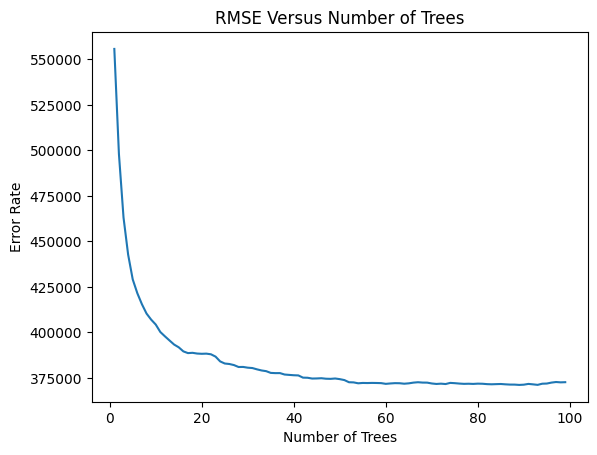

In [ ]:
fig, ax = plt.subplots()

# define data
x_plot = [n for n in range(1, 100)]
y_plot = rmse_list

#plot
ax.plot(x_plot, y_plot)

#customize
ax.set_title("RMSE Versus Number of Trees")
ax.set_xlabel("Number of Trees")
ax.set_ylabel("Error Rate")

plt.savefig('lesson16_5.1_trees.png')
plt.show()

Optional Add-On: Plotting MAPE

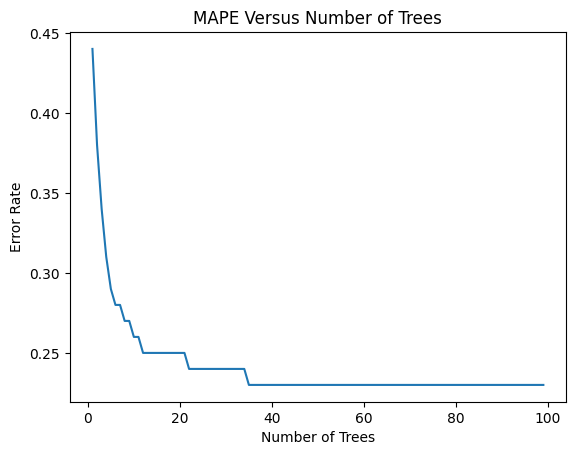

In [ ]:
fig, ax = plt.subplots()

# define data
x_plot = [n for n in range(1, 100)]
y_plot = mape_list

#plot
ax.plot(x_plot, y_plot)

#customize
ax.set_title("MAPE Versus Number of Trees")
ax.set_xlabel("Number of Trees")
ax.set_ylabel("Error Rate")

# plt.savefig('lesson16_5.1_trees.png')
plt.show()

## 5.2: How many trees?

Based on the chart produced in section 5.1, how many trees should we use to create a XGBoost model for this dataset?

Use the markdown cell (and possibly Canvas) to provide your response.


`### Solution Notes`
```
>- Based on plotting the error rates versus trees it looks like using around 40 trees will produce good results.
>- The root mean squared error appears to bottom out around 40 trees and doesn't seem to improve much beyond this.
>- MAPE completely flattens out at around 40 trees
```
---

## 5.3: Grid Search

Having explored how to get the number of trees by storing and analyzing error rates for various number of trees, let's now explore using `GridSearchCV` to find optimal values for the key parameters discussed at the beginning of this section.

In the next cell, perform a grid search using the following values for each parameter:

>- `n_estimators = [20, 40, 50, 100, 200]`
>- `learning_rate = [.01, .1, .2, .3]`



### 5.3.1: Parameter Values

Define the parameter values in the next cell.

In [ ]:
n_estimators = [20, 40, 50, 100, 200]
learning_rate = [.01, .1, .2, .3]

### 5.3.2: Define the Parameter Grid

In the next cell define `param_grid`.
>- Recall: a parameter grid is a dictionary that maps the parameter names to the values we want to test (e.g, 'n_estimators':n_estimators)

In [ ]:
param_grid = {'n_estimators':n_estimators,
             'learning_rate': learning_rate,
              }

### 5.3.3: Import `GridSearchCV`

In the next cell, import the `GridSearchCV` package.

In [ ]:
from sklearn.model_selection import GridSearchCV

### 5.3.4: Grid Search

In the next cell, perform a grid search.

>- When instantiating the model, set a random state of 42
>- Recall: [GridSearchCV doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) if you need a refresher on grid search in scikit-learn.
>- By default, grid search uses `sklearn.metrics.r2_score` for regression
>>- You can change this setting by changing the `scoring` parameter

In [ ]:
xgb = XGBRegressor(random_state = 42)

grid = GridSearchCV(xgb, param_grid)

### 5.3.5: Fit Grid Model

In the next cell, fit the grid model to the training data.
>- Set the `eval_metric` parameter to 'rmse'
>- Set `early_stopping_rounds` to 5

Note: This may take a while to complete depending on your grid search parameters so give it time and let the grid search do its thing.



In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
grid.fit(X_train, y_train,
         early_stopping_rounds = 5,
         eval_set = [(X_test, y_test)],
         eval_metric = 'rmse',
         verbose = False # suppress the output, there will be a lot
         )

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'n_estimators': [20, 40, 50, 100, 200]})

### 5.3.6: Cross Validation Results

In the next cell, show the cross validation results from the grid search.

>- Show the results as a DataFrame sorted by the highest ranking model

In [ ]:
pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,0.40,0.05,0.01,0.00,0.10,200,"{'learning_rate': 0.1, 'n_estimators': 200}",0.65,0.60,0.63,0.64,0.65,0.63,0.02,1
14,0.21,0.03,0.01,0.00,0.20,200,"{'learning_rate': 0.2, 'n_estimators': 200}",0.65,0.60,0.63,0.63,0.66,0.63,0.02,2
13,0.21,0.04,0.01,0.00,0.20,100,"{'learning_rate': 0.2, 'n_estimators': 100}",0.65,0.60,0.63,0.63,0.66,0.63,0.02,2
12,0.16,0.02,0.01,0.00,0.20,50,"{'learning_rate': 0.2, 'n_estimators': 50}",0.65,0.59,0.64,0.62,0.65,0.63,0.02,4
8,0.30,0.01,0.01,0.00,0.10,100,"{'learning_rate': 0.1, 'n_estimators': 100}",0.64,0.60,0.63,0.64,0.65,0.63,0.02,5
17,0.70,0.82,0.01,0.01,0.30,50,"{'learning_rate': 0.3, 'n_estimators': 50}",0.65,0.59,0.62,0.62,0.65,0.63,0.02,6
16,0.13,0.01,0.01,0.00,0.30,40,"{'learning_rate': 0.3, 'n_estimators': 40}",0.65,0.59,0.62,0.62,0.65,0.63,0.02,7
18,0.15,0.04,0.01,0.00,0.30,100,"{'learning_rate': 0.3, 'n_estimators': 100}",0.65,0.59,0.62,0.62,0.65,0.63,0.02,8
19,0.16,0.05,0.01,0.00,0.30,200,"{'learning_rate': 0.3, 'n_estimators': 200}",0.65,0.59,0.62,0.62,0.65,0.63,0.02,8
11,0.14,0.01,0.01,0.00,0.20,40,"{'learning_rate': 0.2, 'n_estimators': 40}",0.64,0.59,0.63,0.62,0.64,0.63,0.02,10


### 5.6.7: Best Values for Hyperparameters

In the next cell, show the best parameters based on the grid search.

In [ ]:
grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

### 5.6.8: Best Model

In the next cell:
>- Define the best grid model as `best_model`
>- Show the score of the `best_model` rounded to two decimals


In [ ]:
best_model = grid.best_estimator_

print(best_model)

print(f"R2 of Best Model: {round(best_model.score(X_test, y_test),2)}")

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 of Best Model: 0.67


### 5.6.9: Best Model Evaluation Metrics

In the next cell, call the `reg_metrics()` function defined in section 4.2 to show the evaluation metrics for the `best_model`.

In [ ]:
# first need to make predictions
grid_preds = grid.predict(X_test)

# now call the function

reg_metrics(y_test, grid_preds)

Model regression metrics:
MAE: 240049.71
MSE: 139745587388.09
RMSE: 373825.61
MAPE: 0.23


How does this compare to our first default model?

In [ ]:
reg_metrics(y_test, xgb_preds)

Model regression metrics:
MAE: 239283.34
MSE: 139003972600.01
RMSE: 372832.37
MAPE: 0.23


How does this compare to our first default model?
>- *Solution Notes*: It looks like our model using the grid search is worse but remember that our first model could have been "lucky" because we did not perform cross validation when building that model

# Section 6: Final Model

After performing a grid search and being satisfied with the model performance, we can now build our final model.

## 6.1: Instantiate Final Model

In the next cell, define a final random forest classifier based on the results of the best model from the grid search.

In [ ]:
xgb_final = XGBRegressor(n_estimators = 200, learning_rate = .1)

## 6.2: Fit final model

In the next cell, fit the final model using all our available data.

In [ ]:
xgb_final.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## 6.3: Deploy Model

You scored a fancy new job at a prominent real estate company. They need some help with their new app and a feature that shows their clients predicted home prices based on the features you tested and built your model on.

In the next cell, deploy your model on the first 100 homes your new boss wants you to evaluate.

>- Here are the new homes to predict sales values for: [melb_deploy.csv](https://drive.google.com/file/d/1-G7OYokw7-EVSz4vTPsBNx1UkZoT6JlB/view?usp=sharing)
>- Use your final `XGBoost` model to predict the sales prices
>- When reading in the deployment data, make sure to set the index column to the first column (`index_col = 0`)

In [ ]:
melb_deploy = pd.read_csv('melb_deploy.csv', index_col = 0)

In [ ]:
# Now predict the new case species

home_preds = xgb_final.predict(melb_deploy)

# add to deployment dataframe and view

melb_deploy['Price_Prediction'] = home_preds

melb_deploy

,Rooms,Distance,Landsize,BuildingArea,YearBuilt,Price_Prediction
1061,3,11.20,588.00,NaN,NaN,1035718.38
6482,2,1.90,0.00,83.00,2002.00,661156.75
8395,3,6.10,0.00,115.00,1930.00,1027938.69
4659,3,9.90,146.00,106.00,2006.00,590551.00
7386,2,9.10,462.00,NaN,1970.00,773124.25
...,...,...,...,...,...,...
592,4,9.20,642.00,215.00,1955.00,1722856.38
2444,2,8.00,0.00,NaN,NaN,562227.50
6958,5,7.50,431.00,203.00,1920.00,1642080.75
10963,5,11.70,627.00,NaN,2000.00,1750462.00
